In [8]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
%matplotlib inline
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = '<style>svg{width:70% !important; height:70% !important;}</style>'
HTML(style)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Создайте Decision Tree классификатор, используя одноимённый класс из библиотеки sklearn и сохраните его в переменную dt.

У дерева должны быть следующие параметры:
* максимальная глубина - 5 уровней;
* минимальное число образцов в вершине для разделения - 5.

In [3]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

Скачайте набор данных с тремя переменными: sex, exang, num. Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет у пациента заболевание сердца (переменная num), основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang). Обучите дерево решений на этих данных, используйте entropy в качестве критерия.

Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева

In [4]:
df = pd.read_csv(r"https://stepik.org/media/attachments/course/4852/train_data_tree.csv")

In [5]:
df.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [6]:
X = df.drop(['num'], axis=1)

In [7]:
y = df.num

In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [11]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

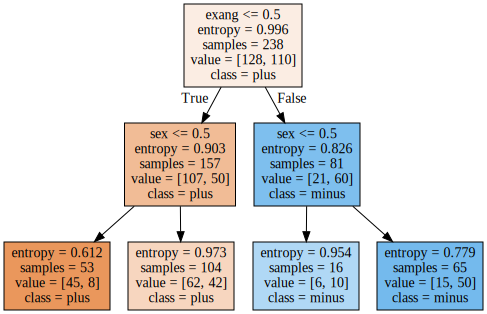

In [18]:
graph = Source(tree.export_graphviz(clf, out_file=None, 
                                   feature_names=list(X), 
                                   class_names=['plus','minus'],
                                   filled=True))
display(SVG(graph.pipe(format='svg')))

In [33]:
enthY = -(128/238)*m.log2(128/238)-(110/238)*m.log2(110/238)
enth1 = -(107/157)*m.log2(107/157)-(50/157)*m.log2(50/157)
enth2 = -(21/81)*m.log2(21/81)-(60/81)*m.log2(60/81)
enthYX = (157/238)*enth1 + (81/238)*enth2
infgain = enthY - enthYX

In [35]:
infgain

0.11939340343891591

Теперь, создав дерево, давайте обучим его и попробуем что-нибудь предсказать!

Для начала опробуем наше дерево на классическом наборе iris, где собраны данные о длине, ширине чашелистиков и лепестков ирисов и их принадлежности к виду. В sklearn он уже встроен, что довольно удобно.

Итак, вам даны 2 numpy эррея с измеренными признаками ирисов и их принадлежностью к виду. Сначала попробуем примитивный способ с разбиением данных на 2 датасэта. Используйте функцию train_test_split для разделения имеющихся данных на тренировочный и тестовый наборы данных, 75% и 25% соответственно.
Затем создайте дерево dt с параметрами по умолчанию и обучите его на тренировочных данных, а после предскажите классы, к которым принадлежат данные из тестовой выборки, сохраните результат предсказаний в переменную predicted.

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.25, random_state=42)

In [12]:
dt = tree.DecisionTreeClassifier()

In [13]:
dt.fit(X, y)

DecisionTreeClassifier()

In [16]:
predicted = dt.predict(X_test)